# Introducción
La regresión logística es una técnica de modelado estadístico utilizada en la minería de datos para predecir la probabilidad de ocurrencia de un evento binario (sí/no o 1/0) en función de una o más variables predictoras. A diferencia de la regresión lineal, que se utiliza para predecir valores continuos, la regresión logística se aplica cuando la variable objetivo es categórica.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/gdrive')

# Ruta del archivo CSV
ruta = "/gdrive/MyDrive/TareaMineria/RegresionLogistica/datasetBancoClean.csv"
df = pd.read_csv(ruta, encoding='latin')

Mounted at /gdrive



Precisión del modelo: 0.8375746846647488
------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


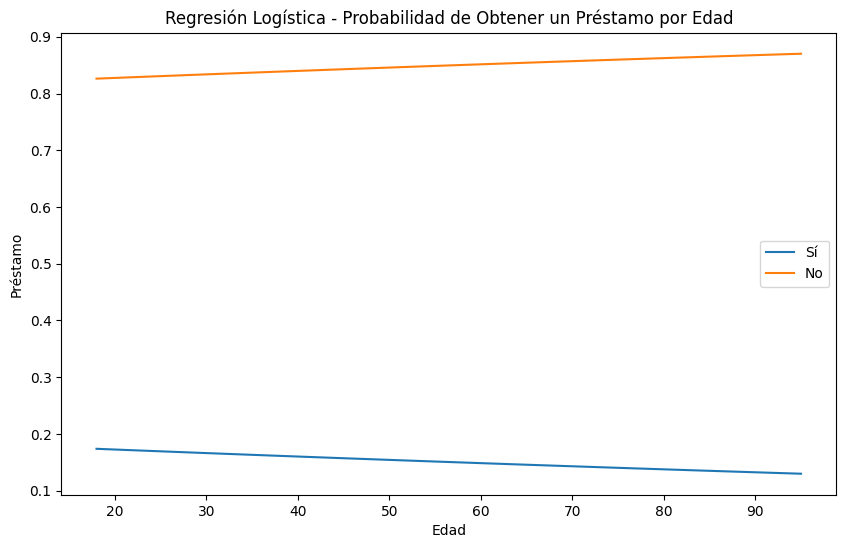

------------------------------------------------------------------------------------
Para una edad de 36, la predicción es: No, no puede obtener un préstamo
------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [3]:
# Seleccionar las características X y la variable objetivo Y
X = df[['age']]
y = df['loan']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y ajustar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("")
print("Precisión del modelo:", accuracy)
print("------------------------------------------------------------------------------------")

edad_rango = np.arange(X['age'].min(), X['age'].max() + 1).reshape(-1, 1)
probabilidades = model.predict_proba(edad_rango)

# Visualizar los resultados
plt.figure(figsize=(10, 6))
# Probabilidad de pertenecer a la clase 'Sí'
plt.plot(edad_rango, probabilidades[:, 1], label='Sí')
# Probabilidad de pertenecer a la clase 'No'
plt.plot(edad_rango, probabilidades[:, 0], label='No')
plt.xlabel('Edad')
plt.ylabel('Préstamo')
plt.title('Regresión Logística - Probabilidad de Obtener un Préstamo por Edad')
plt.legend()
plt.show()

# Función para predecir si se puede obtener un préstamo en función de la edad
def predecir_prestamo_por_edad(edad):
    if edad < X['age'].min() or edad > X['age'].max():
        return "La edad está fuera del rango de datos disponibles"
    else:
        prediccion = model.predict([[edad]])
        if prediccion[0] == 'yes':
            return "Sí, puede obtener un préstamo"
        else:
            return "No, no puede obtener un préstamo"

edad_ejemplo = 36
resultado = predecir_prestamo_por_edad(edad_ejemplo)
print("------------------------------------------------------------------------------------")
print(f"Para una edad de {edad_ejemplo}, la predicción es: {resultado}")
print("------------------------------------------------------------------------------------")

# Conclusión
Bueno concluyo que con la variable que establecí que fue la de la edad para saber en que edad se autorizaría el prestame, como observamos la precisión del modelo fue un poco bajo (0.83), pero se puede solucionar agregando mas factores a la ecuación, o también se podría hacer mas bajo xD, dependiendo de las relaciones entre las variables categoricas.